In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

In [2]:
data = pd.read_csv("../data/processed/model_data.csv")

#### Split Data into Training and Test

In [3]:
y = np.ravel(data[['status']].values)
X = data.iloc[:,1:].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#### Modeling

In [5]:
models = ['KNN', 'SVC', 'NuSVC', 'Bayesian', 'RandomForest']

In [6]:
def model_fit_score(model, X_train, y_train, X_test, y_test):
    if model == 'KNN':
        steps = [('knn', KNeighborsClassifier())]
        parameters = {'knn__n_neighbors':np.arange(1,50), 
                      'knn__weights': ['uniform','distance'],
                       'knn__algorithm':['auto','ball_tree','kd_tree','brute']}
    elif model == 'SVC':
        steps = [('svc', SVC())]
        parameters = {'svc__C':np.logspace(-3, 2, 6), 
                      'svc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'NuSVC':
        steps = [('nusvc', NuSVC())]
        parameters = {'nusvc__nu':np.arange(0.1,1, .01),
                      'nusvc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'Bayesian':
        steps = [('bayes', GaussianNB())]
        parameters = {'bayes__var_smoothing': np.logspace(-9,9,19)}
    elif model == 'RandomForest':
        steps = [('rf', RandomForestClassifier())]
        parameters = {'rf__n_estimators': np.arange(10,100,10),
                     'rf__criterion':['gini','entropy'],
                     'rf__max_depth':np.arange(10,100,10)}
    
    pipeline = Pipeline(steps)
    
    cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
    
    start_time = time.time()
    
    cv.fit(X_train, np.ravel(y_train))
        
    elapsed_time = time.time() - start_time
    
    print('Evaluation in {:.2f} seconds'.format(elapsed_time))
    
    print(str(model)+" Best params:", cv.best_params_)
    print(str(model)+" Best score:", cv.best_score_)
    
    y_pred = cv.predict(X_test)
    
    print(classification_report(y_test, y_pred, zero_division=0))
    plot_confusion_matrix(cv, X_test, y_test)
    plt.title(model + " Confusion Matrix")
    plt.show()
    

In [7]:
def oversample(model):
    oversampling = ['random', 'smote', 'adasyn']
    for method in oversampling:
        if method == 'random':
            ros = RandomOverSampler(random_state=42)
            X_res, y_res = ros.fit_resample(X, y)
        elif method == 'smote':
            X_res, y_res = SMOTE().fit_resample(X, y)
        elif method == 'adasyn':
            X_res, y_res = ADASYN().fit_resample(X, y)

        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                            test_size=0.3, 
                                                            random_state=21, 
                                                            stratify=y_res)
        print('\033[1m' + method.upper() + ' OVERSAMPLING' '\033[0m')
        model_fit_score(models[0], X_train, y_train, X_test, y_test)

#### K-Nearest Neighbors Model

Evaluation in 3.05 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 21, 'knn__weights': 'uniform'}
KNN Best score: 0.4831541218637993
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.00      0.00      0.00         9
           2       0.36      0.53      0.43        15

    accuracy                           0.41        39
   macro avg       0.28      0.36      0.31        39
weighted avg       0.32      0.41      0.36        39



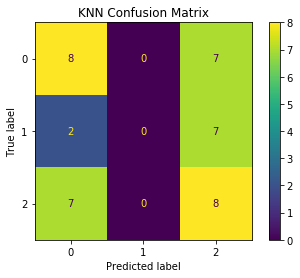

In [15]:
model_fit_score(models[0], X_train, y_train, X_test, y_test)

### K-Nearest Neighbors w/ Oversampling

RANDOM OVERSAMPLING
Evaluation in 3.39 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.50      0.47      0.48        15
           2       0.37      0.47      0.41        15

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.40      0.40      0.40        45



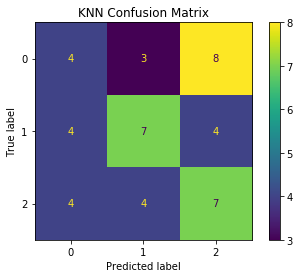

SMOTE OVERSAMPLING
Evaluation in 3.31 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 23, 'knn__weights': 'uniform'}
KNN Best score: 0.4380952380952381
              precision    recall  f1-score   support

           0       0.35      0.40      0.38        15
           1       0.26      0.33      0.29        15
           2       0.11      0.07      0.08        15

    accuracy                           0.27        45
   macro avg       0.24      0.27      0.25        45
weighted avg       0.24      0.27      0.25        45



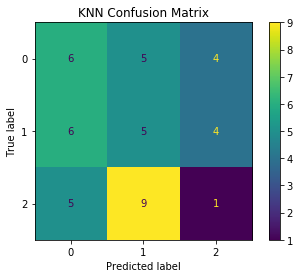

ADASYN OVERSAMPLING
Evaluation in 3.32 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
KNN Best score: 0.5045045045045046
              precision    recall  f1-score   support

           0       0.44      0.47      0.45        15
           1       0.48      0.61      0.54        18
           2       0.11      0.07      0.08        15

    accuracy                           0.40        48
   macro avg       0.34      0.38      0.36        48
weighted avg       0.35      0.40      0.37        48



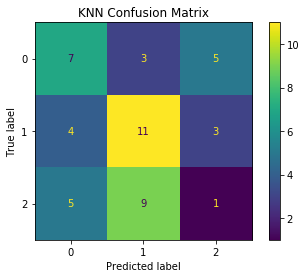

In [63]:
oversample(models[0])

#### SVC Model

Evaluation in 2.56 seconds
SVC Best params: {'svc__C': 0.01, 'svc__kernel': 'linear'}
SVC Best score: 0.4838709677419355
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        15
           1       0.00      0.00      0.00         9
           2       0.31      0.53      0.39        15

    accuracy                           0.31        39
   macro avg       0.21      0.27      0.23        39
weighted avg       0.24      0.31      0.26        39



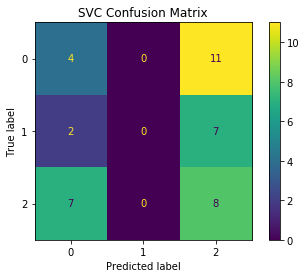

In [8]:
model_fit_score(models[1], X_train, y_train, X_test, y_test)

#### SVC Model w/ Oversampling

RANDOM OVERSAMPLING
Evaluation in 3.15 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.50      0.47      0.48        15
           2       0.37      0.47      0.41        15

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.40      0.40      0.40        45



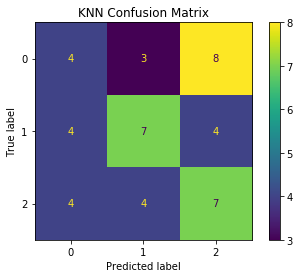

SMOTE OVERSAMPLING
Evaluation in 3.24 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 4, 'knn__weights': 'uniform'}
KNN Best score: 0.4666666666666666
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        15
           1       0.38      0.33      0.36        15
           2       0.19      0.20      0.19        15

    accuracy                           0.29        45
   macro avg       0.29      0.29      0.29        45
weighted avg       0.29      0.29      0.29        45



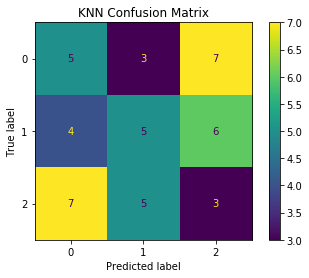

ADASYN OVERSAMPLING
Evaluation in 3.09 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
KNN Best score: 0.4677177177177178
              precision    recall  f1-score   support

           0       0.30      0.47      0.37        15
           1       0.41      0.39      0.40        18
           2       0.00      0.00      0.00        15

    accuracy                           0.29        48
   macro avg       0.24      0.29      0.26        48
weighted avg       0.25      0.29      0.27        48



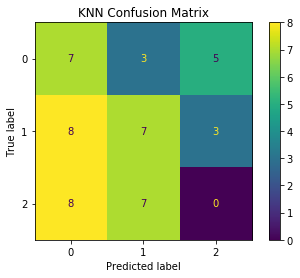

In [8]:
oversample(models[1])

#### NuSVC Model

Evaluation in 19.02 seconds
NuSVC Best params: {'nusvc__kernel': 'linear', 'nusvc__nu': 0.5799999999999997}
NuSVC Best score: 0.5157706093189964
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.67      0.44      0.53         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.63      0.59      0.58        39
weighted avg       0.62      0.62      0.59        39



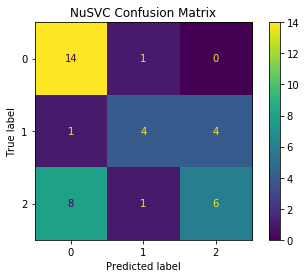

In [9]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2], X_train, y_train, X_test, y_test)

#### NuSVC Model w/ Oversampling

RANDOM OVERSAMPLING
Evaluation in 3.19 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.50      0.47      0.48        15
           2       0.37      0.47      0.41        15

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.40      0.40      0.40        45



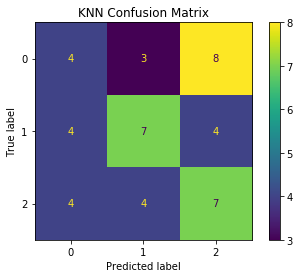

SMOTE OVERSAMPLING
Evaluation in 3.21 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.4666666666666666
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        15
           1       0.43      0.40      0.41        15
           2       0.39      0.47      0.42        15

    accuracy                           0.38        45
   macro avg       0.38      0.38      0.37        45
weighted avg       0.38      0.38      0.37        45



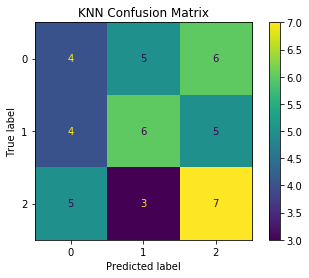

ADASYN OVERSAMPLING
Evaluation in 3.20 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
KNN Best score: 0.5225225225225225
              precision    recall  f1-score   support

           0       0.41      0.47      0.44        15
           1       0.48      0.61      0.54        18
           2       0.12      0.07      0.09        15

    accuracy                           0.40        48
   macro avg       0.34      0.38      0.35        48
weighted avg       0.35      0.40      0.37        48



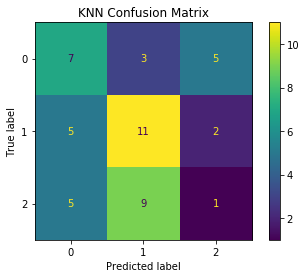

In [10]:
oversample(models[2])

#### Bayesian Model

Evaluation in 0.14 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-06}
Bayesian Best score: 0.4827956989247311
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.67      0.22      0.33         9
           2       0.73      0.53      0.62        15

    accuracy                           0.62        39
   macro avg       0.65      0.56      0.55        39
weighted avg       0.65      0.62      0.58        39



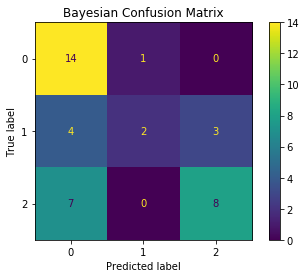

In [10]:
model_fit_score(models[3], X_train, y_train, X_test, y_test)

#### Bayesian Model w/ Oversampling

RANDOM OVERSAMPLING
Evaluation in 3.11 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.50      0.47      0.48        15
           2       0.37      0.47      0.41        15

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.40      0.40      0.40        45



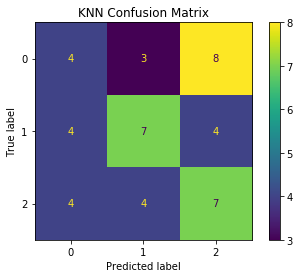

SMOTE OVERSAMPLING
Evaluation in 3.21 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 2, 'knn__weights': 'uniform'}
KNN Best score: 0.4857142857142857
              precision    recall  f1-score   support

           0       0.41      0.80      0.55        15
           1       0.50      0.40      0.44        15
           2       0.75      0.20      0.32        15

    accuracy                           0.47        45
   macro avg       0.55      0.47      0.44        45
weighted avg       0.55      0.47      0.44        45



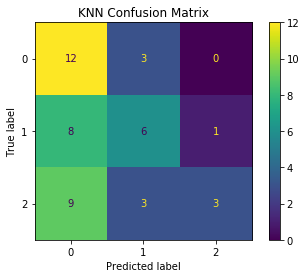

ADASYN OVERSAMPLING
Evaluation in 3.25 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
KNN Best score: 0.48673673673673673
              precision    recall  f1-score   support

           0       0.35      0.47      0.40        15
           1       0.55      0.61      0.58        18
           2       0.12      0.07      0.09        15

    accuracy                           0.40        48
   macro avg       0.34      0.38      0.36        48
weighted avg       0.35      0.40      0.37        48



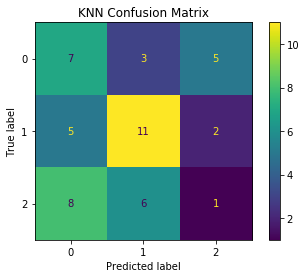

In [11]:
oversample(models[3])

#### Random Forest Model

Evaluation in 57.78 seconds
RandomForest Best params: {'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__n_estimators': 40}
RandomForest Best score: 0.5602150537634408
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        15
           1       0.00      0.00      0.00         9
           2       0.44      0.47      0.45        15

    accuracy                           0.46        39
   macro avg       0.32      0.40      0.35        39
weighted avg       0.37      0.46      0.41        39



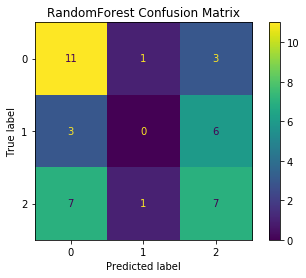

In [11]:
model_fit_score(models[4], X_train, y_train, X_test, y_test)

#### Random Forest w/ Oversampling

RANDOM OVERSAMPLING
Evaluation in 3.45 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Best score: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.50      0.47      0.48        15
           2       0.37      0.47      0.41        15

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.40      0.40      0.40        45



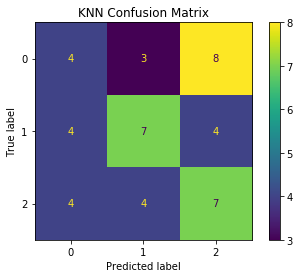

SMOTE OVERSAMPLING
Evaluation in 3.20 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 42, 'knn__weights': 'distance'}
KNN Best score: 0.4857142857142857
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.44      0.47      0.45        15
           2       0.30      0.40      0.34        15

    accuracy                           0.38        45
   macro avg       0.39      0.38      0.38        45
weighted avg       0.39      0.38      0.38        45



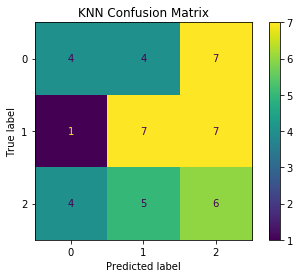

ADASYN OVERSAMPLING
Evaluation in 3.20 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 8, 'knn__weights': 'uniform'}
KNN Best score: 0.5045045045045046
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        15
           1       0.45      0.56      0.50        18
           2       0.08      0.07      0.07        15

    accuracy                           0.33        48
   macro avg       0.30      0.32      0.31        48
weighted avg       0.31      0.33      0.32        48



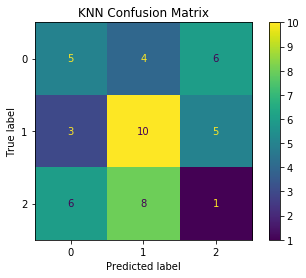

In [12]:
oversample(models[4])